In [1]:
import pandas as pd 
import os

In [2]:
files=[f for f in os.listdir('/Users/saeedazad/Downloads/'
                             'Pandas-Data-Science-Tasks-master/'
                             'SalesAnalysis/Sales_Data')]

#### Merging the 12 months of sales data into a signle csv file


In [3]:
all_months_data=pd.DataFrame()
for f in files:
    df=pd.read_csv('/Users/saeedazad/Downloads/'
                             'Pandas-Data-Science-Tasks-master/'
                             'SalesAnalysis/Sales_Data/'+f)
    all_months_data=pd.concat([all_months_data,df])

In [4]:
all_months_data.to_csv("all_data.csv",index=False)

In [5]:
all_data=pd.read_csv(
    '/Users/saeedazad/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv')

In [6]:
all_data.shape

(186850, 6)

#### Add Month column

##### get the Error: invalid literal for int() with base 10: 'Or'  by running following code
##### it indicate that you are passing a string that's not an integer to the int() function . In other words it's either empty, or has a character in it other than a digit

#### all_data['Month']=all_data['Month'].astype('int32')

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [8]:
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data=all_data.dropna(how='all')

In [10]:
all_data.shape


(186304, 6)

In [11]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,07/06/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,01/06/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [12]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [13]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])


<ipython-input-13-f0e4e8847aac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
<ipython-input-13-f0e4e8847aac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=pd.to_numeric(all_data['Price Each'])


In [14]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')


<ipython-input-14-56e4880a817b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Order Date'].str[0:2]
<ipython-input-14-56e4880a817b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype('int32')


In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [16]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [17]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

<ipython-input-17-cb2f1fef76b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']


In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [19]:
highestSales=all_data.groupby(['Month'])['Sales'].agg(MontlyPrice='sum').reset_index()
highestSales.MontlyPrice

0     2.286906e+06
1     2.394467e+06
2     2.793085e+06
3     3.229765e+06
4     3.033276e+06
5     2.684603e+06
6     2.721873e+06
7     2.447042e+06
8     2.413751e+06
9     3.475537e+06
10    3.086325e+06
11    3.925407e+06
Name: MontlyPrice, dtype: float64

In [20]:
results=all_data.groupby('Month').sum()


In [21]:
import matplotlib.pyplot as plt
import numpy as np

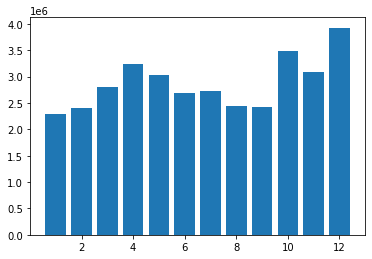

In [22]:
ind= range(1,13)
width=0.35
#plt.bar(ind,highestSales.MontlyPrice,width)
plt.bar(ind,results['Sales'])
#plt.yticks(np.arange(0,5000000,1000000))
plt.show()

In [23]:
def get_city(x):
    return x.split(',')[1]
    #lambda x:x.split(',')[1]

In [48]:
def get_state(x):
    #return x.split(',')[2][0:3]
    return x.split(',')[2].split(' ')[1]

In [78]:
all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+ ',' + get_state(x))
all_data['State']=all_data['Purchase Address'].apply(lambda x:get_state(x))
all_data

<ipython-input-78-3effa3744bbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+ ',' + get_state(x))
<ipython-input-78-3effa3744bbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['State']=all_data['Purchase Address'].apply(lambda x:get_state(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City,NY",NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City,NY",NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City,NY",NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco,CA",CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta,GA",GA
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,07/06/19 19:02,"795 Pine St, Boston, MA 02215",7,2.99,"Boston,MA",MA
186846,222906,27in FHD Monitor,1,149.99,01/06/19 19:29,"495 North St, New York City, NY 10001",1,149.99,"New York City,NY",NY
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,"San Francisco,CA",CA
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,"San Francisco,CA",CA


#### what city had the highest of sales

In [26]:
#all_data['City']=all_data['Purchase Address'].str.split(',').str[1]
#all_data['State']=all_data['Purchase Address'].str.split(',').str[2].str[0:3]
#all_data

In [79]:
richCity=all_data.groupby(['City'])['Sales'].agg(CitySales='sum').reset_index()

In [80]:
results=all_data.groupby('City').sum()

In [81]:
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta,GA",16602,2.779908e+06,102054,2.795499e+06
"Austin,TX",11153,1.809874e+06,68428,1.819582e+06
"Boston,MA",22528,3.637410e+06,137528,3.661642e+06
"Dallas,TX",16730,2.752628e+06,101376,2.767975e+06
"Los Angeles,CA",33289,5.421435e+06,202471,5.452571e+06
"New York City,NY",27932,4.635371e+06,170626,4.664317e+06
"Portland,ME",2750,4.471893e+05,16601,4.497583e+05
"Portland,OR",11303,1.860558e+06,68813,1.870732e+06
"San Francisco,CA",50239,8.211462e+06,306750,8.262204e+06


In [72]:
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta,GA",16602,2.779908e+06,102054,2.795499e+06
"Austin,TX",11153,1.809874e+06,68428,1.819582e+06
"Boston,MA",22528,3.637410e+06,137528,3.661642e+06
"Dallas,TX",16730,2.752628e+06,101376,2.767975e+06
"Los Angeles,CA",33289,5.421435e+06,202471,5.452571e+06
"New York City,NY",27932,4.635371e+06,170626,4.664317e+06
"Portland,ME",2750,4.471893e+05,16601,4.497583e+05
"Portland,OR",11303,1.860558e+06,68813,1.870732e+06
"San Francisco,CA",50239,8.211462e+06,306750,8.262204e+06


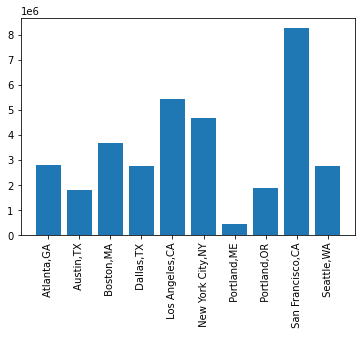

In [84]:
cities=list(richCity.City)
width=1
plt.bar(cities,richCity.CitySales)
plt.xticks(cities,rotation='vertical')
plt.show()

In [86]:
all_data.drop(columns='State',inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City,NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City,NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City,NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco,CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta,GA"
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,07/06/19 19:02,"795 Pine St, Boston, MA 02215",7,2.99,"Boston,MA"
186846,222906,27in FHD Monitor,1,149.99,01/06/19 19:29,"495 North St, New York City, NY 10001",1,149.99,"New York City,NY"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,"San Francisco,CA"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,"San Francisco,CA"


In [94]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.dtypes

<ipython-input-94-9e6f6831e010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [109]:
#all_data['Hour']=all_data['Order Date'].dt.strftime('%H:%M')
all_data['Hour']=all_data['Order Date'].dt.hour

<ipython-input-109-71db34edaeb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=all_data['Order Date'].dt.hour


In [110]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City,NY",0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City,NY",7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City,NY",18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco,CA",15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta,GA",12


In [117]:
pOrderTime=all_data.groupby(['Hour'])['Sales'].agg(Peak='count').reset_index()
pOrderTime

,Hour,Peak
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


In [118]:
pOrderTime.Peak

0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Peak, dtype: int64

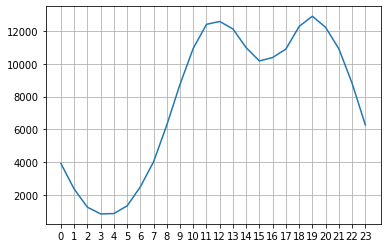

In [122]:
t=list(pOrderTime.Hour)
plt.xticks(t)
plt.plot(t,pOrderTime.Peak)
plt.grid()
plt.show()

In [123]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City,NY",0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City,NY",7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City,NY",18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco,CA",15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta,GA",12
